# A star

In [23]:
def astarAlgo(startNode, stopNode):
    openset = set(startNode)
    closedset = set()
    g = {}
    p = {}
    g[startNode] = 0
    p[startNode] = startNode
    
    while(len(openset)>0):
        n = None
        for v in openset:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n = v
        if n==stopNode or graphNode[n] == None:
            pass
        else:
            for m,w in get_neighbour(n):
                if m not in openset and m not in closedset:
                    openset.add(m)
                    g[m] = g[n]+w
                    p[m] = n
                else:
                    if g[m]>g[n]+w:
                        g[m] = g[n]+w
                        p[m] = n
                        if m in closedset:
                            closedset.remove(m)
                            openset.add(m)
        if n==None:
            print("PDE")
            return None
        if n==stopNode:
            path = []
            while p[n]!=n:
                path.append(n)
                n = p[n]
            path.append(startNode)
            path.reverse()
            print("Path: ",path)
            return path
        openset.remove(n)
        closedset.add(n)
    print("PDE")
    return None
def get_neighbour(v):
    if v in graphNode:
        return graphNode[v]
    else:
        return None
def heuristic(v):
    Hdist={
        'A':9,
        'B':6,
        'C':3,
        'D':2,
        'E':0
    }
    return Hdist[v]
graphNode = {
    'A':[('B',3),('D',10)],
    'B':[('A',3),('C',4),('E',6)],
    'C':[('B',4),('E',3)],
    'D':[('A',10),('E',2)]
}
astarAlgo('A','E')

Path:  ['A', 'B', 'E']


['A', 'B', 'E']

# AO star

In [32]:
class Graph:
    def __init__(self, startNode, heuristicNodeList, graph):
        self.H = heuristicNodeList
        self.start = startNode
        self.graph = graph
        self.parent = {}
        self.status = {}
        self.solutionGraph = {}
    def aoStarAlgo(self):
        self.aostar(self.graph, False)
    def getHeuristicNodeValue(self,n):
        return self.H.get(n,0)
    def setHeuristicNodeValue(self,n,value):
        self.H[n] = value
    def setstatus(self,v,value):
        self.status[v] = value
    def getstatus(self,v):
        return self.status.get(v,0)
    def getNeighbour(self,v):
        return self.graph.get(v,'')
    def printSolution(self):
        print("for graph solution traverse the graph from the start node:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")
    def computeMinCostChildNode(self,v):
        minCostNode = 0
        childNodelistDict = {}
        childNodelistDict[minCostNode] = []
        flag = True
        for tuple in self.getNeighbour(v):
            Cost = 0
            childNodeList=[]
            for c,w in tuple:
                Cost = Cost + self.getHeuristicNodeValue(v)+w
                childNodeList.append(c)
            if flag==True:
                minCostNode = Cost
                childNodelistDict[minCostNode] = childNodeList
                flag = False
            else:
                if minCostNode>Cost:
                    minCostNode = Cost
                    childNodelistDict[minCostNode] = childNodeList
        return minCostNode, childNodelistDict[minCostNode]
    def aostar(self,v,backtracking):
        print("heuristic value",self.H)
        print("solu graph",self.graph)
        print("processing node",v)
        
        if self.getstatus(v):
            minCost,childNodeList = computeMinCostChildNode(v)
            self.setHeuristicNodeValue(v,minCost)
            self.setstatus(v,len(childNodeList))
            solved = True
            
            for childNode in childNodeList:
                self.parent[childNode] = v
                if self.getstatus(childNode)!=-1:
                    solved = solved&False
            
            if solved==True:
                self.setstatus(v,-1)
                self.solutionGraph[v] = childNodeList
                
            if v!=self.start:
                self.aostar(self.parent[v],True)
                
            if backtracking==False:
                for childNode in childNodeList:
                    self.setstatus(childNode,0)
                    self.aostar(childNode,False)
h2 = {'A': 1,
      'B': 6,
      'C': 12,
      'D': 10,
      'E': 4,
      'F': 4,
      'G': 5,
      'H': 7}  # Heuristic values of Nodes 
graph2 = {                                        # Graph of Nodes and Edges 
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],      # Neighbors of Node 'A', B, C & D with repective weights 
    'B': [[('G', 1)], [('H', 1)]],                # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]]                   # Each sublist indicate a "OR" node or "AND" nodes
}
 
G2 = Graph(graph2, h2, 'A')                       # Instantiate Graph object with graph, heuristic values and start Node
G2.aoStarAlgo()                                  # Run the AO* algorithm
G2.printSolution()                                # Print the solution graph as output of the AO* algorithm search

heuristic value {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
solu graph A
processing node A
for graph solution traverse the graph from the start node: {'A': [[('B', 1), ('C', 1)], [('D', 1)]], 'B': [[('G', 1)], [('H', 1)]], 'D': [[('E', 1), ('F', 1)]]}
------------------------------------------------------------
{}
------------------------------------------------------------


# locally weighted regression

In [33]:
import numpy as np
import matplotlib.pyplot as plt


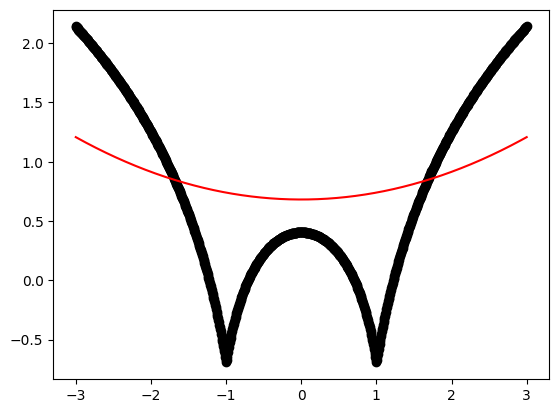

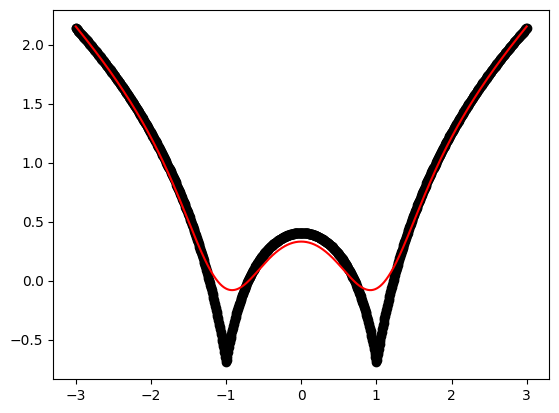

In [34]:
def local_regression(x0,x,y,tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta
def draw(tau):
    prediction = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain,prediction,color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2-1)+0.5)
draw(10)
draw(0.1)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r"C:\Users\manit\Downloads\tennisdata.csv")
data.head(5)

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [36]:
x = data.iloc[:,:-1]
x.head(5)

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [39]:
y = data.iloc[:,-1]
y.head(5)

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

In [45]:
le_out = LabelEncoder()
x.Outlook = le_out.fit_transform(x.Outlook)

le_temp = LabelEncoder()
x.Temperature = le_temp.fit_transform(x.Temperature)

le_hum = LabelEncoder()
x.Humidity = le_hum.fit_transform(x.Humidity)

le_windy = LabelEncoder()
x.Windy = le_windy.fit_transform(x.Windy)

le_play = LabelEncoder()
y = le_play.fit_transform(y)

print(x.head(5))
print(y)

   Outlook  Temperature  Humidity  Windy
0        2            1         0      1
1        2            1         0      0
2        0            1         0      1
3        1            2         0      1
4        1            0         1      1
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
model = GaussianNB()
model.fit(xtrain,ytrain)
predicted = model.predict(xtest)
print("accuracy:",accuracy_score(predicted,ytest))

accuracy: 0.6666666666666666


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
x = pd.DataFrame(data["data"],columns=["sepal_length","sepal_width","petal_length","petal_width"])
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
y = pd.DataFrame(data["target"],columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


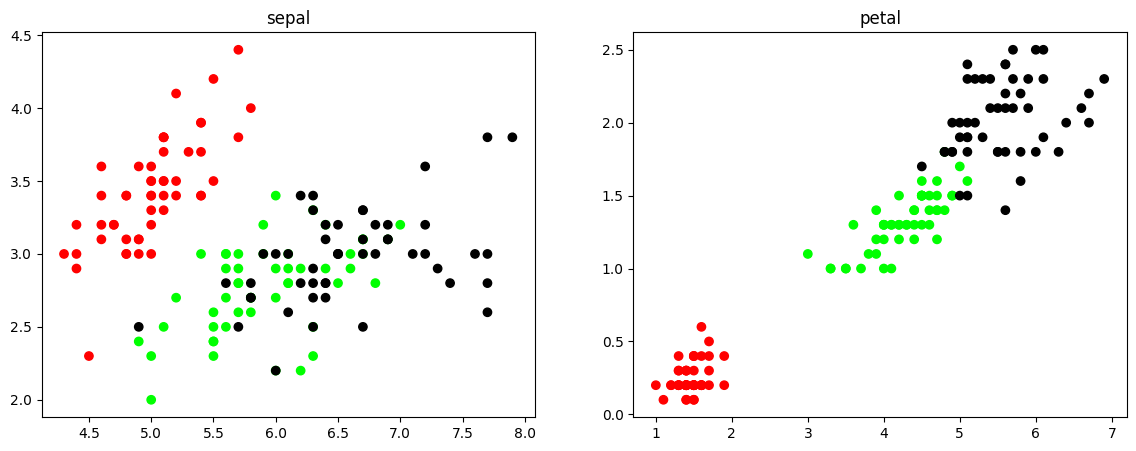

In [63]:
colormap = np.array(["red","lime","black"])
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(x.sepal_length,x.sepal_width,c=colormap[y.target])
plt.title("sepal")

plt.subplot(1,2,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target])
plt.title("petal")
plt.show()

accuracy score: 0.2894736842105263
confusion matrix:
 [[ 0 10  6]
 [11  0  0]
 [ 0  0 11]]


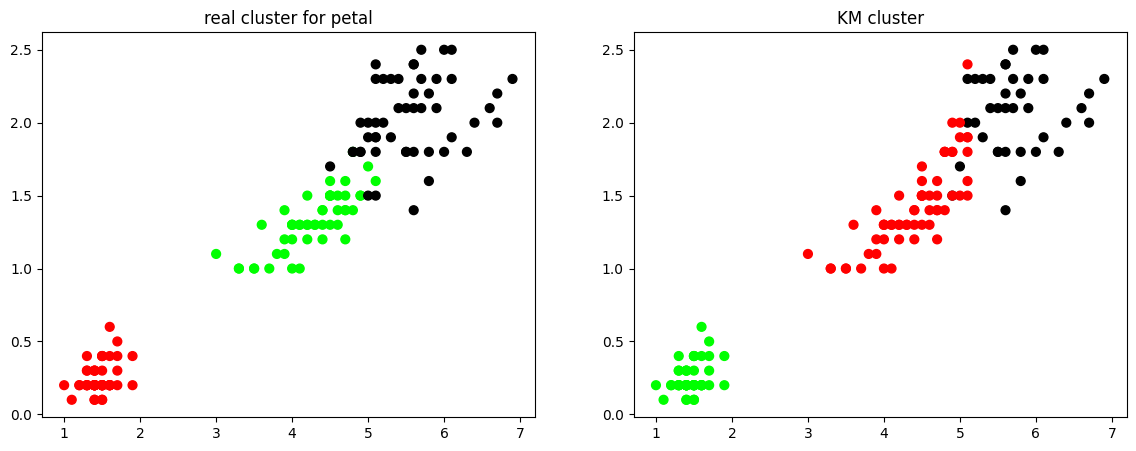

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(data.data,data.target)
model1 = KMeans(n_clusters=3)
model1.fit(x)
val = model1.predict(xtest)
print("accuracy score:",metrics.accuracy_score(val,ytest))
print("confusion matrix:\n",metrics.confusion_matrix(val,ytest))
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target],s=40)
plt.title("real cluster for petal")

plt.subplot(1,2,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[model1.labels_],s=40)
plt.title("KM cluster")
plt.show()

accuracy score: 0.23684210526315788
confusion matrix:
 [[ 0  1  9]
 [ 0  9  1]
 [18  0  0]]


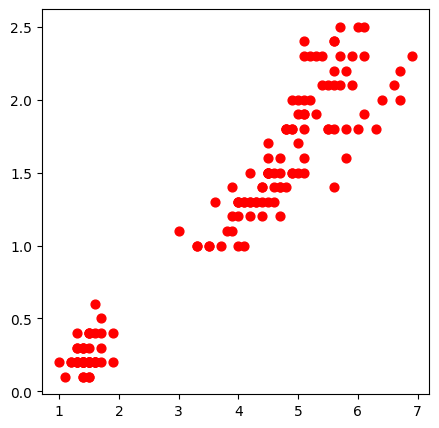

In [75]:
model2 = GaussianMixture(n_components=3)
model2.fit(x)
predicted = model2.predict(xtest)
print("accuracy score:",metrics.accuracy_score(val,ytest))
print("confusion matrix:\n",metrics.confusion_matrix(val,ytest))

plt.figure(figsize=(5,5))
plt.scatter(x.petal_length,x.petal_width,c=colormap[0],s=40)
plt.show()